In [11]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [14]:
# Create df from all scripts
trekScript = pd.read_json('all_scripts_raw.json')

In [15]:
#Create df from all lines
trekLines = pd.read_json('all_series_lines.json')

In [16]:
# Get all ds9 scripts and narrow down to get rid of NaNs
ds9Script = trekScript['DS9']
ds9Scripts = ds9Script[0:173]
type(ds9Scripts)

pandas.core.series.Series

In [17]:
# idk why I did this, besides not wanting to deal with quotes
ds9 = 'DS9'

In [18]:
# Get all ds9 lines and narrow down to get rid of NaN
ds9Lines = trekLines['DS9']
ds9Lines = ds9Lines[0:173]
type(ds9Lines)

pandas.core.series.Series

In [19]:
# Create object with all ds9 episodes 

ds9_episodes = trekLines['DS9'].keys()
ds9_episodes = ds9_episodes[0:173]
type(ds9_episodes)

pandas.core.indexes.base.Index

In [20]:
# Create list of all ds9 characters
ds9_char = ds9Lines['episode 172'].keys()

characters = []
for c in ds9_char:
    characters.append(c)
    
len(characters)

718

In [9]:
# Show lines in ds9 episode 140 "In the Pale Moonlight", can skip since it's a test
# ds9Lines['episode 140']

{'JENNIFER': [],
 'OPS': [],
 'JASAD': [],
 'PICARD': [],
 'MAGGIE': [],
 'DUKAT': [],
 'BUREAUCRAT': [],
 'CONN': [],
 'KIRA': ['Kira to Captain Sisko.',
  'We just received a priority one communication from StarfleetCommand. The Dominion has invaded Betazed.',
  "With Betazed in the hands of the Jem'Hadar, the Dominion is in aposition to threaten Vulcan, Andor, Tellar, Alpha Centauri.",
  'Ops to Captain Sisko.',
  "We've just received the coded subspace signal you werewaiting for. Should I reply?"],
 'PIT': [],
 'SISKO': ["Captain's personal log, stardate five one seven, er, five oneseven four? Computer, what day is it?",
  "It's only been two weeks. I need to talk about this. I have tojustify what'shappened, what I've done, at least to myself. I can't talk to anyoneelse. Not even to Dax. Maybe if I just lay it all out in my log, it'llfinally make sense. I can see where it all went wrong. Where I wentwrong. I suppose it started two weeks ago,",
  "While I was posting the weekly casu

In [10]:
# Show script of ds9 episode 140 "In the Pale Moonlight", can skip since it's a test
# ds9Scripts['episode 172']

"\n\n\n\n\n\nThe Deep Space Nine Transcripts - What You Leave Behind\n\n\n\nWhat\nYou Leave Behind\nStardate:\nUnknown\nOriginal Airdate: 31 May, 1999\n\n\n\n\n\n\n  [Bashir's\nbedroom] \nCOMPUTER: Doctor Bashir. The time is oh five\nhundred. \nBASHIR: Yeah, all right. \nEZRI: Julian. \nBASHIR: Yes. \nEZRI: We have to get up. \nBASHIR: Are you sure? \nEZRI: It's a big day. \nBASHIR: It was a big night. It cleared up a lot of unanswered\nquestions. \nEZRI: Such as? \nBASHIR: Such as just how far these spots really go down. \nEZRI: I suppose you'll want to tell Miles. \nBASHIR: Why would I want to do that? \nEZRI: Because you tell him everything. \nBASHIR: True, but you know what? In this case, I'm going to make an\nexception. \nEZRI: Good. Oh, we really should get up. We don't want the Defiant\nleaving without us. \nBASHIR: You know, I've never been into battle with someone I've slept\nwith before. \nEZRI: There's a first time for everything. \nBASHIR: Now that we're finally together, i

In [21]:
# Copied from GARY BROUGHTON via Kaggle

total_lines_counts={}
line_counts_by_episode={}
for i,ep in enumerate(ds9_episodes):
    episode="episode "+str(i)
    line_counts_by_episode[episode]={}
    if trekLines[ds9][ep] is not np.NaN:
        for member in list(trekLines[ds9][ep].keys()):
            line_counts_by_episode[episode][member]=len(trekLines[ds9][ep][member])
            if member in total_lines_counts.keys():
                total_lines_counts[member]=total_lines_counts[member]+len(trekLines[ds9][ep][member])
            else:
                total_lines_counts[member]=len(trekLines[ds9][ep][member])

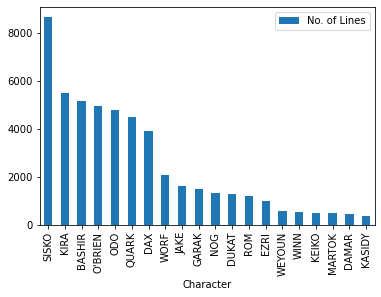

In [22]:
# copied from GARY BROUGHTON via Kaggle

DS9_df = pd.DataFrame(list(total_lines_counts.items()), columns=['Character','No. of Lines'])
Top20 = DS9_df.sort_values(by='No. of Lines', ascending=False).head(20)

Top20.plot.bar(x='Character',y='No. of Lines')
plt.show()

In [23]:
# Fill all NaNs with 0

ds9e = pd.DataFrame(data=line_counts_by_episode)
ds9e = ds9e.fillna(0)
ds9e['episode 14']

JENNIFER       0.0
OPS            0.0
JASAD          0.0
PICARD         0.0
MAGGIE         0.0
              ... 
BROCA          0.0
BROIK          0.0
LONAR          0.0
EKOOR          0.0
CARDASSIANS    0.0
Name: episode 14, Length: 718, dtype: float64

<AxesSubplot:title={'center':'Episode 0: Emissary'}, xlabel='Character'>

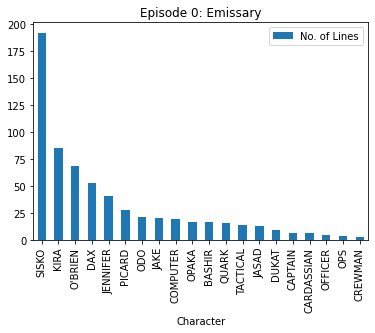

In [24]:
# based on code by GARY BROUGHTON via Kaggle
# create a graph of characters who spoke most lines in first episode of ds9

ds9eps = pd.DataFrame(list(ds9e['episode 0'].items()), columns = ['Character', 'No. of Lines'])
Top20 = ds9eps.sort_values(by='No. of Lines', ascending=False).head(20)

Top20.plot.bar(x='Character',y='No. of Lines', title='Episode 0: Emissary')


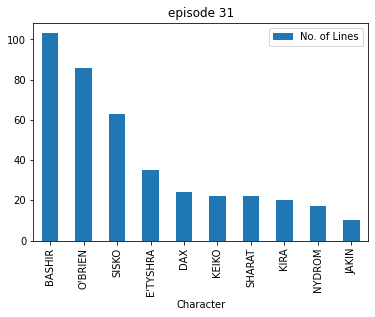

In [26]:
# Create a function that makes a bar graph with characters who speak most lines, call the episode by number

def CreateGraph(num):
    for ep in ds9e:
        ep = 'episode ' + num
        ds9_line_eps=pd.DataFrame(list(ds9e[ep].items()), columns=['Character', 'No. of Lines'])
        top10 = ds9_line_eps.sort_values(by='No. of Lines', ascending=False).head(10)
    top10.plot.bar(x='Character',y='No. of Lines', title="episode " + num)
    
CreateGraph('31')

In [31]:
# create a list of episode titles by hand, a pain in the ass
ds9_titles = [
"Emissary",
"Past Prologue",
"A Man Alone",
"Babel", 
"Captive Pursuit",
"Q-Less",
"Dax",
"The Passenger",
"Move Along Home",
"The Nagus",
"Vortex", 
"Battle Lines",
"The Storyteller",
"Progress",
"If Wishes Were Horses",
"The Forsaken",
"Dramatis Personae",
"Duet",
"In the Hands of the Prophets",
"The Homecoming",
"The Circle",
"The Siege",
"Invasive Procedures",
"Cardassians",
"Melora", 
"Rules of Acquisition",
"Necessary Evil",
"Second Sight",
"Sanctuary",
"Rivals",
"The Alternate",
"Armageddon Game",
"Whispers",
"Paradise",
"Shadowplay",
"Playing God",
"Profit and Loss",
"Blood Oath",
"The Maquis, Part One",
"The Maquis, Part Two",
"The Wire", 
"Crossover", 
"The Collaborator", 
"Tribunal",
"The Jem'Hadar",
"The Search, Part One",
"The Search, Part Two",
"The House of Quark", 
"Equilibrium", 
"Second Skin", 
"The Abandoned", 
"Civil Defense", 
"Meridian", 
"Defiant", 
"Fascination", 
"Past Tense, Part One",
"Past Tense, Part Two",
"Life Support", 
"Heart of Stone", 
"Destiny", 
"Prophet Motive", 
"Visionary",
"Distant Voices", 
"Through the Looking Glass", 
"Improbable Cause", 
"The Die is Cast",
"Explorers", 
"Family Business", 
"Shakaar",
"Facets", 
"The Adversary", 
"The Way of the Warrior", 
"The Visitor", 
"Hippocratic Oath",
"Indiscretion", 
"Rejoined", 
"Starship Down", 
"Little Green Men", 
"The Sword of Kahless", 
"Our Man Bashir", 
"Homefront", 
"Paradise Lost", 
"Crossfire", 
"Return to Grace", 
"Sons of Mogh", 
"Bar Association", 
"Accession",
"Rules of Engagement", 
"Hard Time", 
"Shattered Mirror", 
"The Muse", 
"For the Cause", 
"To the Death", 
"The Quickening", 
"Body Parts", 
"Broken Link", 
"Apocalypse Rising", 
"The Ship", 
"Looking for par'Mach in All the Wrong Places", 
"...Nor the Battle to the Strong", 
"The Assignment",
"Trials and Tribble-ations",
"Let He Who is Without Sin...",
"Things Past", 
"The Ascent",
"Rapture", 
"The Darkness and the Light", 
"The Begotten", 
"For the Uniform", 
"In Purgatory's Shadow", 
"By Inferno's Light", 
"Doctor Bashir I Presume?", 
"A Simple Investigation", 
"Business as Usual", 
"Ties of Blook and Water", 
"Ferengi Love Songs", 
"Soldiers of the Empire", 
"Children of Time", 
"Blaze of Glory", 
"Empok Nor", 
"In the Cards", 
"Call to Arms", 
"A Time to Stand", 
"Rocks and Shoals", 
"Sons and Daughters", 
"Behind the Lines", 
"Favor the Bold", 
"Sacrifice of Angels", 
"You are Cordially Invited",
"Resurrection", 
"Statistical Improbabilities",
"The Magnificent Ferengi", 
"Waltz", 
"Who Mourns for Morn?", 
"Far Beyond the Stars",
"One Little Ship", 
"Honor Among Thieves", 
"Change of Heart", 
"Wrongs Darker Than Death or Night",
"Inquisition", 
"In the Pale Moonlight", 
"His Way", 
"The Reckoning", 
"Valiant", 
"Profit and Lace", 
"Time's Orphan", 
"The Sound of Her Voice",
"Tears of the Prophets", 
"Image in the Sand", 
"Shadows and Symbols", 
"Afterimage", 
"Take Me Out to the Holosuite",
"Chrysalis", 
"Treachery, Faith, and the Great River", 
"Once More Unto the Breach", 
"The Siege of AR-558", 
"Covenant", 
"It's Only a Paper Moon", 
"Prodigal Daughter", 
"The Emperor's New Cloak", 
"Field of Fire", 
"Chimera", 
"Badda-Bing, Badda-Bang", 
"Inter Arma Enim Silent Leges", 
"Penumbra", 
"Til Death Do Us Part", 
"Strange Bedfellows", 
"The Changing Face of Evil", 
"When It Rains...", 
"Tacking Into the Wind", 
"Extreme Measures", 
"The Dogs of War", 
"What You Leave Behind"
]

ds9_titles

['Emissary',
 'Past Prologue',
 'A Man Alone',
 'Babel',
 'Captive Pursuit',
 'Q-Less',
 'Dax',
 'The Passenger',
 'Move Along Home',
 'The Nagus',
 'Vortex',
 'Battle Lines',
 'The Storyteller',
 'Progress',
 'If Wishes Were Horses',
 'The Forsaken',
 'Dramatis Personae',
 'Duet',
 'In the Hands of the Prophets',
 'The Homecoming',
 'The Circle',
 'The Siege',
 'Invasive Procedures',
 'Cardassians',
 'Melora',
 'Rules of Acquisition',
 'Necessary Evil',
 'Second Sight',
 'Sanctuary',
 'Rivals',
 'The Alternate',
 'Armageddon Game',
 'Whispers',
 'Paradise',
 'Shadowplay',
 'Playing God',
 'Profit and Loss',
 'Blood Oath',
 'The Maquis, Part One',
 'The Maquis, Part Two',
 'The Wire',
 'Crossover',
 'The Collaborator',
 'Tribunal',
 "The Jem'Hadar",
 'The Search, Part One',
 'The Search, Part Two',
 'The House of Quark',
 'Equilibrium',
 'Second Skin',
 'The Abandoned',
 'Civil Defense',
 'Meridian',
 'Defiant',
 'Fascination',
 'Past Tense, Part One',
 'Past Tense, Part Two',
 'Life S

In [33]:
# Create dataframe with "Episode" and "Title" columns

ds9Titles = pd.DataFrame(zip(ds9_episodes, ds9_titles), columns=['Episode','Title'])
ds9Titles.head(10)

,Episode,Title
0,episode 0,Emissary
1,episode 1,Past Prologue
2,episode 2,A Man Alone
3,episode 3,Babel
4,episode 4,Captive Pursuit
5,episode 5,Q-Less
6,episode 6,Dax
7,episode 7,The Passenger
8,episode 8,Move Along Home
9,episode 9,The Nagus


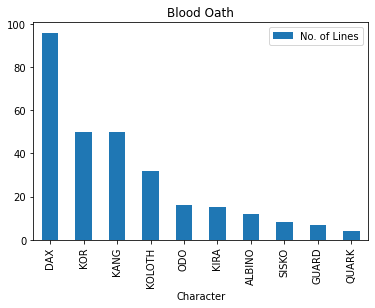

In [34]:
# Create a function that takes in a number and makes a bar graph with characters who speak most lines in that episode, add episode title as title

def CreateTitledGraph(num):
    for ep in ds9e:
        ep = 'episode ' + str(num)
        ds9_line_eps=pd.DataFrame(list(ds9e[ep].items()), columns=['Character', 'No. of Lines'])
        top10 = ds9_line_eps.sort_values(by='No. of Lines', ascending=False).head(10)
        for t in ds9_titles:
            t = ds9_titles[num]
    top10.plot.bar(x='Character',y='No. of Lines', title = t)
 
CreateTitledGraph(37)

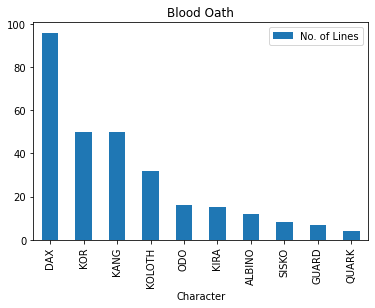

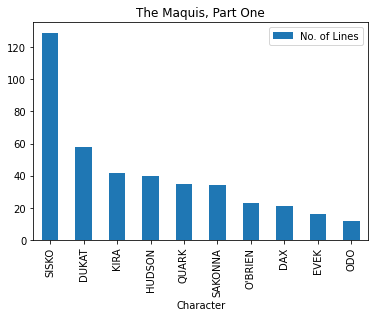

In [35]:
CreateTitledGraph(37)
CreateTitledGraph(38)

In [36]:
print(ds9Titles[ds9Titles['Title'] == 'Blood Oath'].index.values)

[37]


In [37]:
ds9Titles['Title'].loc[2]


'A Man Alone'

In [20]:
ds9e

,episode 0,episode 1,episode 2,episode 3,episode 4,episode 5,episode 6,episode 7,episode 8,episode 9,...,episode 163,episode 164,episode 165,episode 166,episode 167,episode 168,episode 169,episode 170,episode 171,episode 172
JENNIFER,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
OPS,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
JASAD,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
PICARD,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
MAGGIE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BROCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17
BROIK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
LONAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
EKOOR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [86]:
# copied code from 36
print(ds9Titles[ds9Titles['Title'] == 'Blood Oath'].index[0])

37


In [91]:
# Create same fuction, but with the input as the episode title instead of episode number?

# def CreateTitledGraph(num):
#     for ep in ds9e:
#         ep = 'episode ' + str(num)
#         ds9_line_eps=pd.DataFrame(list(ds9e[ep].items()), columns=['Character', 'No. of Lines'])
#         top10 = ds9_line_eps.sort_values(by='No. of Lines', ascending=False).head(10)
#         for t in ds9_titles:
#             t = ds9_titles[num]
#     top10.plot.bar(x='Character',y='No. of Lines', title = t)

def GraphFromTitle(title):
    for i in ds9Titles:
        i = ds9Titles[ds9Titles['Title'] == str(title)].index[0]
#        print(str(i))
        for ep in ds9e:
            ep = 'episode ' + str(i)
            ds9_line_eps=pd.DataFrame(list(ds9e[ep].items()), columns=['Character', 'No. of Lines'])
            top10 = ds9_line_eps.sort_values(by='No. of Lines', ascending=False).head(10)
    top10.plot.bar(x='Character',y='No. of Lines', title = title)

    

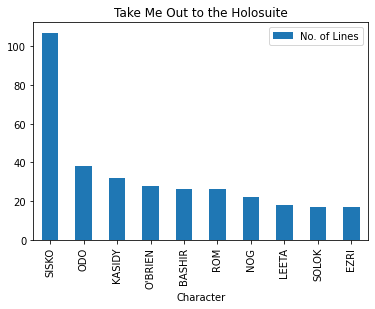

In [94]:
GraphFromTitle('Take Me Out to the Holosuite')